# Задачи к Лекции 7

Дана база данных рукописаного текста MNIST (только цифры). Данная база состоит из 70000 объектов, каждый из которых представлен изображением 28x28 пикселей и имеющих метку от 0 до 9.

**Чтение данных**

In [1]:
%matplotlib inline
import zipfile
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# https://www.openml.org/d/554
# Это займет умеренно существенно время, пока данные скачаются
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [2]:
# немного уменьшим данные (опционально)
X = X[:10000]
y = y[:10000]

**Получение различной информации**

In [3]:
X.shape

(10000, 784)

In [4]:
y.shape

(10000,)

In [5]:
y[0]

'5'

In [6]:
# преобразуем метки в числа
#list(map(int, y))
Y = list(map(int, y))
Y = np.array(Y)
Y

array([5, 0, 4, ..., 6, 9, 7])

Проверим, что наглая обрезка данных выше не попортила баланс целевых исходов.

In [10]:
np.unique(Y, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1001, 1127,  991, 1032,  980,  863, 1014, 1070,  944,  978]))

Убедимся, что это и правда числа

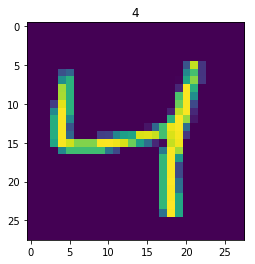

In [11]:
n = 2

plt.imshow(X[n].reshape((28, 28)))
plt.title("%d" % Y[n])
plt.show()

Попробуем наивное обучение с помощью kNN

In [12]:
from sklearn.model_selection import train_test_split

train, test, target_train, target_test = train_test_split(X, Y, shuffle=False)

In [13]:
train.shape, test.shape

((7500, 784), (2500, 784))

In [14]:
%%time 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(3)
# Это будет довольно долго
knn.fit(train, target_train)

CPU times: user 972 ms, sys: 6.38 ms, total: 978 ms
Wall time: 991 ms


In [15]:
%%time 

# Это будет очень долго
predict = knn.predict(test)

CPU times: user 20.2 s, sys: 0 ns, total: 20.2 s
Wall time: 20.3 s


In [16]:
accuracy_score(target_test, predict)

0.9336

**1. Выбрать любой из классификаторов градиентного бустинга, представленного в лекции (SKLearn, XGBoost, LightGBM, CatBoost). Подобрать их гиперпараметры так, чтобы получить наименьшую ошибку доли правильных ответов (accuracy_score). Для этого необходимо самостоятельно изучить соответствующие классификаторы и их гиперпараметры.**

In [25]:
# Your code here

**Комментарии:**